In [218]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
import re
%matplotlib inline


In [60]:
data_train = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/train.csv')
data_test = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/test.csv')
print(data_train.head())
print('test data')
print(data_test.info())
print(data_train.info())
print(data_train.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
te

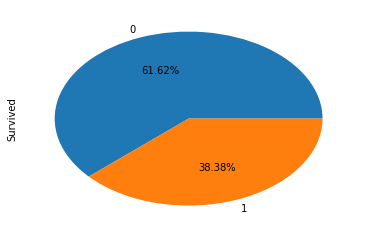

In [9]:
data_train.Survived.value_counts().plot.pie(autopct='%.2f%%')

In [108]:
from sklearn.ensemble import RandomForestRegressor

age_df = data_train[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[age_df.Age.notnull()]
age_df_isnull = age_df.loc[age_df.Age.isnull()]
# age_df_notnull.info()
# age_df_isnull.info()
# age_df_isnull.shape
# age_df_notnull.head()

X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# X[:5]
# Y.head()
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RFR.fit(X,Y)
# age_df_isnull.head()
predictAge = RFR.predict(age_df_isnull.values[:,1:])
predictAge[:10]
data_train.loc[ data_train.Age.isnull(), 'Age' ] = predictAge
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [51]:
data_train.groupby(['Sex','Survived'])['Survived'].size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

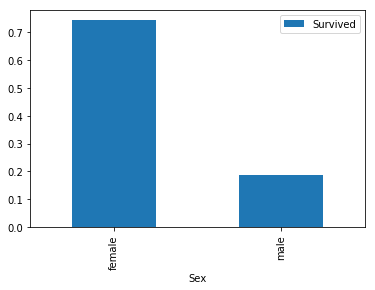

In [53]:
data_train.groupby('Sex')['Survived','Sex'].mean().plot.bar()

In [66]:
data_train.groupby(['Sex','Pclass'])['Survived','Sex','Pclass'].size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


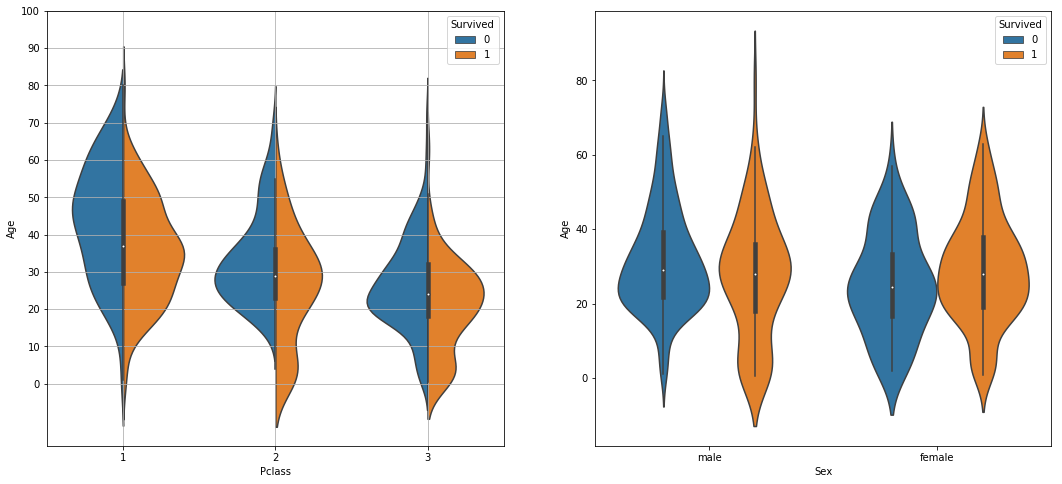

In [73]:
fig,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',split=True,data=data_train,ax=ax[0])
ax[0].set_yticks(range(0,110,10))
ax[0].grid()

sns.violinplot('Sex','Age',hue='Survived',split=False,data=data_train,ax=ax[1])

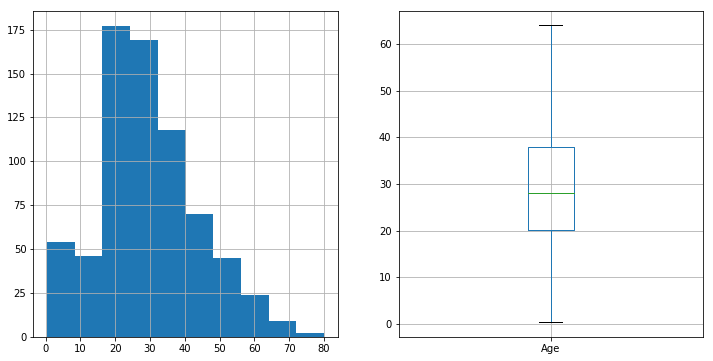

In [78]:
fg,ax = plt.subplots(1,2,figsize=(12,6))
data_train.Age.hist(ax=ax[0])
data_train.boxplot('Age',showfliers=False)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


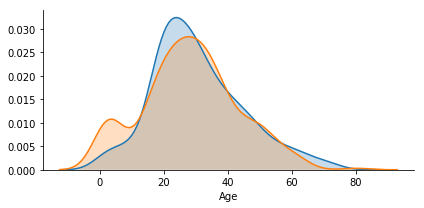

In [95]:
# plt.figure(figsize=(12,6))
facet = sns.FacetGrid(data_train,hue='Survived',aspect=2)
facet.map( sns.kdeplot,'Age',shade=True )


In [100]:
data_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

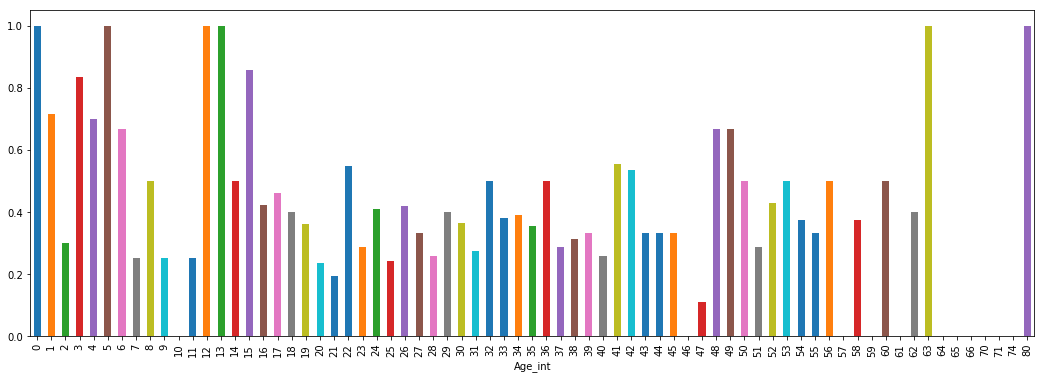

In [121]:
plt.figure(figsize=(18,6))
data_train['Age_int'] = data_train.Age.astype(int)
# data_train[data_train.Age_int<3,]
# data_train['Age'].astype(int).describe()
data_train.groupby('Age_int')['Survived'].mean().plot.bar()

In [118]:
np.ceil([4.2,2.1,6.7])

array([5., 3., 7.])

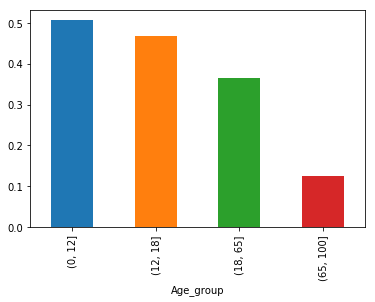

In [128]:
bins = [0,12,18,65,100]
data_train['Age_group'] = pd.cut(data_train.Age,bins)
data_train.groupby('Age_group')['Survived'].mean().plot.bar()

In [136]:
data_train.head()
data_train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [141]:
data_train['Title'] = data_train['Name'].str.extract('([A-Za-z]+)\.',expand=False)
np.unique(data_train.Title)
data_train.Title.describe()

count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object

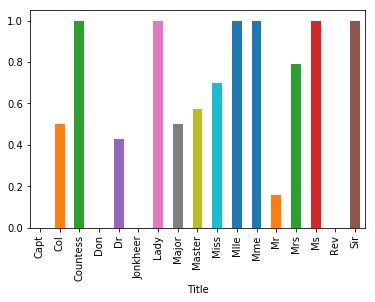

In [142]:
data_train.groupby('Title')['Survived'].mean().plot.bar()

                                                Name  Name_len
0                            Braund, Mr. Owen Harris        23
1  Cumings, Mrs. John Bradley (Florence Briggs Th...        51
2                             Heikkinen, Miss. Laina        22
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)        44
4                           Allen, Mr. William Henry        24


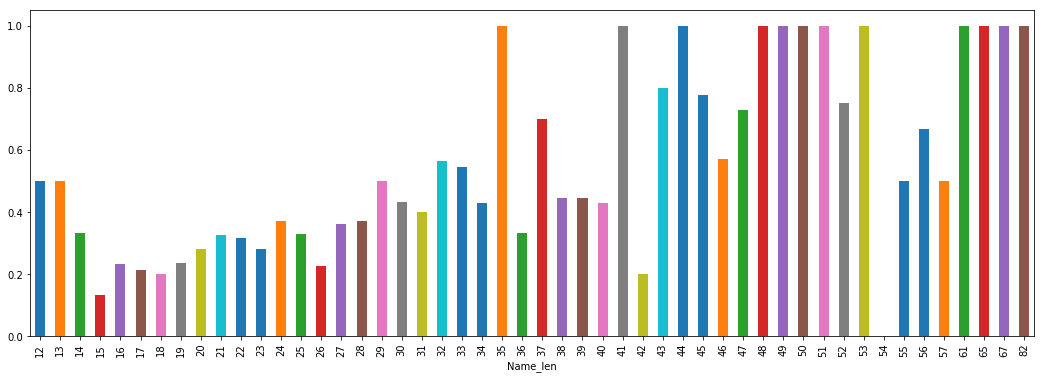

In [148]:
data_train['Name_len'] = data_train.Name.apply(len)
print(data_train[['Name','Name_len']].head())
plt.figure(figsize=(18,6))
data_train.groupby('Name_len')['Survived'].mean().plot.bar()

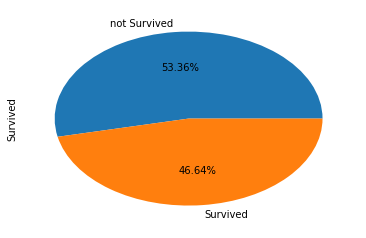

In [161]:
sibsp_df = data_train[data_train.SibSp!=0]
np.unique(sibsp_df.SibSp)
np_sibsp_df = data_train[data_train.SibSp==0]

sibsp_df.Survived.value_counts().plot.pie(autopct='%.2f%%',labels=['not Survived','Survived'])


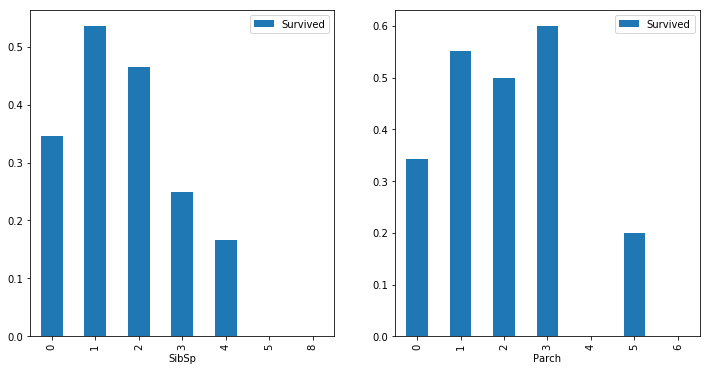

In [170]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
data_train[['SibSp','Survived']].groupby('SibSp').mean().plot.bar(ax= ax[0])
data_train[['Parch','Survived']].groupby('Parch').mean().plot.bar(ax=ax[1])

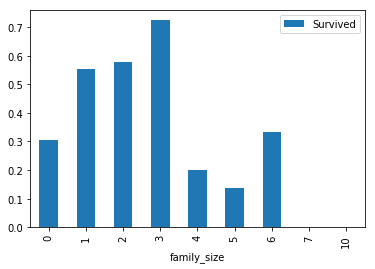

In [172]:
data_train['family_size'] = data_train['SibSp'] + data_train['Parch']
data_train.head()
data_train[['family_size','Survived']].groupby('family_size').mean().plot.bar()

(0, 200)

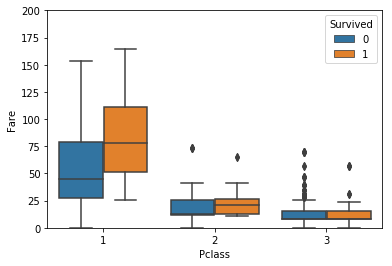

In [183]:
# data_train['Fare'].hist(bins=100)
sns.boxplot('Pclass','Fare',hue='Survived',data=data_train)
plt.ylim(0,200)

In [184]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_int        891 non-null int64
Age_group      891 non-null category
Title          891 non-null object
Name_len       891 non-null int64
family_size    891 non-null int64
dtypes: category(1), float64(2), int64(8), object(6)
memory usage: 112.4+ KB


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_int Age_group Title  \
0      0         A/5 21171   7.2500    U0        S       22  (18, 65]    Mr   
1      0          PC 17599  71.2833   C85        C       38  (18, 65]   Mrs   
2      0  STON/O2. 3101282   7.9250    U0        S       26  (18, 65]  Miss   
3   

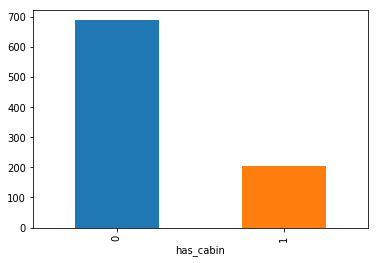

In [199]:
print(data_train[:5])
# data_train['Cabin'].fillna('U0',inplace=True)
data_train.loc[ data_train.Cabin.isnull(),'Cabin' ] = 'U0'
# print(data_train[:5])
# data_train['has_cabin'] = np.where(data_train['Cabin']=='U0',0,1)
data_train['has_cabin'] = data_train.Cabin.apply(lambda x:0 if x=='U0' else 1 )

data_train.groupby('has_cabin')['Survived'].size().plot.bar()


In [202]:
data_train.Cabin.unique()

array(['U0', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

In [203]:
data_train['CabinLetter'] = data_train['Cabin'].str.extract()

TypeError: extract() missing 1 required positional argument: 'pat'

In [204]:
pd.crosstab(data_train.Title,data_train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [217]:
data_train.groupby(['Title','Sex'])['Sex'].count().unstack()

Sex,female,male
Title,,
Capt,NaN,1.0
Col,NaN,2.0
Countess,1.0,NaN
Don,NaN,1.0
Dr,1.0,6.0
Jonkheer,NaN,1.0
Lady,1.0,NaN
Major,NaN,2.0
Master,NaN,40.0


  Cabin CabinLetter
0    U0           U
1   C85           C
2    U0           U
3  C123           C
4    U0           U
['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


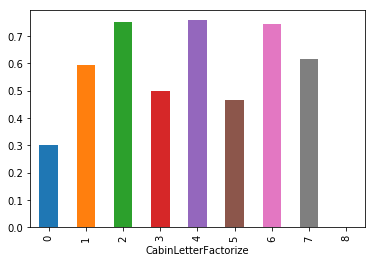

In [240]:
data_train['CabinLetter'] = data_train['Cabin'].map(lambda x:re.compile('([A-Za-z]+)').search(x).group(0))
print(data_train[['Cabin','CabinLetter']].head())
print(data_train.CabinLetter.unique())
data_train['CabinLetterFactorize'] = pd.factorize(data_train.CabinLetter)[0]
data_train[['CabinLetter','CabinLetterFactorize']].head()
data_train.groupby('CabinLetterFactorize')['Survived'].mean().plot.bar()

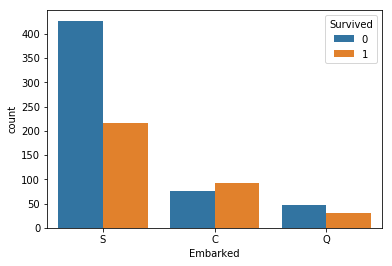

In [237]:
sns.countplot('Embarked',hue='Survived',data=data_train)

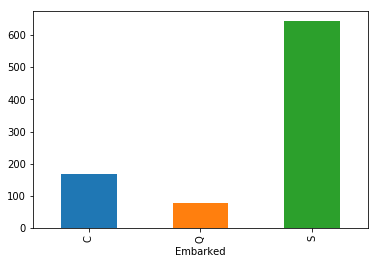

In [239]:
data_train.groupby('Embarked')[['Survived','Embarked']].size().plot.bar()

In [255]:
embarked_dummies = pd.get_dummies(data_train['Embarked'])
embarked_dummies.head()
data_train = data_train.join(embarked_dummies)
data_train.drop(['Embarked'],axis=1, inplace=True)
data_train.head()

KeyError: 'Embarked'

In [256]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_group,Title,Name_len,family_size,has_cabin,CabinLetter,CabinLetterFactorize,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"(18, 65]",Mr,23,1,0,U,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"(18, 65]",Mrs,51,1,1,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"(18, 65]",Miss,22,0,0,U,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"(18, 65]",Mrs,44,1,1,C,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"(18, 65]",Mr,24,0,0,U,0,0,0,1


In [260]:
np.shape(data_train)

(5, 22)

In [266]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# np.shape(scaler.fit_transform(data_train['Age']))
data_train['Age_scaled'] = scaler.fit_transform(data_train['Age'].values.reshape(-1,1))
print(data_train.Age.head())
data_train.Age_scaled.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


0   -1.505166
1    1.112514
2   -0.850746
3    0.621699
4    0.621699
Name: Age_scaled, dtype: float64

In [274]:
data_train['Fare_bin'] = pd.qcut(data_train['Fare'],5)
data_train.Fare_bin.head()

0       (7.249, 7.79]
1    (56.737, 71.283]
2         (7.79, 8.0]
3     (26.07, 56.737]
4        (8.0, 26.07]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(7.249, 7.79] < (7.79, 8.0] < (8.0, 26.07] < (26.07, 56.737] < (56.737, 71.283]]

In [285]:
print(pd.factorize(data_train['Fare_bin']))
data_train['Fare_bin_id'] = pd.factorize(data_train['Fare_bin'])[0]
print(data_train.Fare_bin_id.head())
Fare_bin_dummies = pd.get_dummies(data_train['Fare_bin']).rename(columns = lambda x: 'Fare_'+str(x))
print(Fare_bin_dummies.head())
# data_train = data_train.join(Fare_bin_dummies)
print(data_train.head())
data_train = pd.concat([data_train,Fare_bin_dummies],axis=1)


(array([0, 1, 2, 3, 4]), CategoricalIndex([(7.249, 7.79], (56.737, 71.283], (7.79, 8.0],
                  (26.07, 56.737], (8.0, 26.07]],
                 categories=[(7.249, 7.79], (7.79, 8.0], (8.0, 26.07], (26.07, 56.737], (56.737, 71.283]], ordered=True, dtype='category'))
0    0
1    1
2    2
3    3
4    4
Name: Fare_bin_id, dtype: int64
   Fare_(7.249, 7.79]  Fare_(7.79, 8.0]  Fare_(8.0, 26.07]  \
0                   1                 0                  0   
1                   0                 0                  0   
2                   0                 1                  0   
3                   0                 0                  0   
4                   0                 0                  1   

   Fare_(26.07, 56.737]  Fare_(56.737, 71.283]  
0                     0                      0  
1                     0                      1  
2                     0                      0  
3                     1                      0  
4                     0             

In [610]:
train_df_org = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/train.csv')
test_df_org = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/Titanic/test.csv')
print(train_df_org.head())
print(train_df_org.shape)
print(test_df_org.shape)
print(test_df_org.head())
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)
combined_train_test.shape

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(1309, 12)

In [292]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [299]:
combined_train_test.Embarked.mode().iloc[0]
combined_train_test.fillna(combined_train_test.Embarked.mode().iloc[0],inplace=True)

In [300]:
combined_train_test.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [301]:
print(combined_train_test.Embarked.head())
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]
combined_train_test.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object


0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

In [337]:
embarked_dummies = pd.get_dummies(combined_train_test.Embarked,prefix=combined_train_test[['Embarked']].columns.tolist()[0])
print(embarked_dummies.head())
# combined_train_test = combined_train_test.join(embarked_dummies)
# combined_train_test.head()
# print(combined_train_test.tail())
pd.concat([combined_train_test,embarked_dummies],axis=1).head()


   Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
0           0           0           1
0           0           1           0
0           0           1           0
1           1           0           0


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,female,male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,1,0,0,1
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,1,0,0,1
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,0,1,0,1,0
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,0,1,0,1,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,0,1,0,0


In [336]:
combined_train_test = combined_train_test.join( pd.get_dummies(combined_train_test['Sex']) )
# combined_train_test.head()
# combined_train_test.drop(['Sex_female','Sex_male'],axis=1)
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,female,male
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,1
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,0,1
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,0,1
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,1,0


In [387]:
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x:re.compile('([a-zA-Z]+)\.').search(x).group(1) )
# combined_train_test['Title'] = combined_train_test['Name'].str.extract('([a-zA-Z]+)\.')
print(combined_train_test[['Name','Title']].head())
print(combined_train_test.Title.unique())
# data_train['Title'] = data_train['Name'].str.extract('([A-Za-z]+)\.',expand=False)


                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']


In [379]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

title_Dict

{'Capt': 'Officer',
 'Col': 'Officer',
 'Major': 'Officer',
 'Dr': 'Officer',
 'Rev': 'Officer',
 'Don': 'Royalty',
 'Sir': 'Royalty',
 'the Countess': 'Royalty',
 'Dona': 'Royalty',
 'Lady': 'Royalty',
 'Mme': 'Mrs',
 'Ms': 'Mrs',
 'Mrs': 'Mrs',
 'Mlle': 'Miss',
 'Miss': 'Miss',
 'Mr': 'Mr',
 'Master': 'Master',
 'Jonkheer': 'Master'}

In [343]:
dt = {}
dt.update(dict.fromkeys(['a','b'], 5))
dt

{'a': 5, 'b': 5}

In [388]:
combined_train_test['Title_new'] = combined_train_test['Title'].map( title_Dict )
combined_train_test[['Title','Title_new']].head(5)

,Title,Title_new
0,Mr,Mr
1,Mrs,Mrs
2,Miss,Miss
3,Mrs,Mrs
4,Mr,Mr


In [392]:
title_dummies = pd.get_dummies(combined_train_test['Title_new'],prefix='title')
title_dummies.head()
combined_train_test = pd.concat([combined_train_test,title_dummies],axis=1)
# combined_train_test.join(title_dummies)
combined_train_test.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_new,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,0,A.5. 3236,Mr,Mr,0,0,1,0,0,0
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,0,PC 17758,Dona,Royalty,0,0,0,0,0,1
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,0,SOTON/O.Q. 3101262,Mr,Mr,0,0,1,0,0,0
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,0,359309,Mr,Mr,0,0,1,0,0,0
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,0,2668,Master,Master,1,0,0,0,0,0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


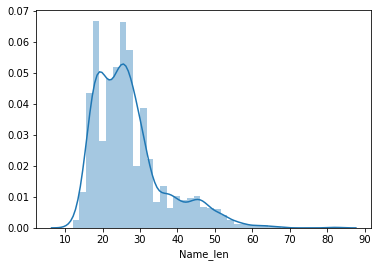

In [394]:
combined_train_test['Name_len'] = combined_train_test['Name'].apply(len)
sns.distplot(combined_train_test['Name_len'])
# sns.countplot(combined_train_test['Name_len'], hue=combined_train_test['Survived'])

<Figure size 864x432 with 0 Axes>

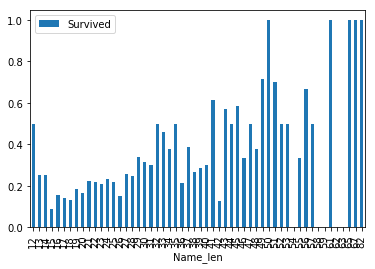

In [401]:
fig = plt.figure(figsize=(12,6))
combined_train_test[['Name_len','Survived']].groupby('Name_len').mean().plot.bar()

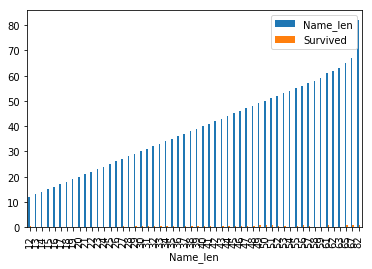

In [402]:
combined_train_test.groupby('Name_len')[['Name_len','Survived']].mean().plot.bar()

In [403]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
Age              1046 non-null float64
Cabin            295 non-null object
Embarked         1307 non-null object
Fare             1308 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Survived         1309 non-null int64
Ticket           1309 non-null object
Title            1309 non-null object
Title_new        1308 non-null object
title_Master     1309 non-null uint8
title_Miss       1309 non-null uint8
title_Mr         1309 non-null uint8
title_Mrs        1309 non-null uint8
title_Officer    1309 non-null uint8
title_Royalty    1309 non-null uint8
Name_len         1309 non-null int64
dtypes: float64(2), int64(6), object(7), uint8(6)
memory usage: 211.3+ KB


In [407]:
t = combined_train_test.iloc[:5,:2]
print(t)
t.merge(t)

    Age Cabin
0  22.0   NaN
1  38.0   C85
2  26.0   NaN
3  35.0  C123
4  35.0   NaN


,Age,Cabin
0,22.0,NaN
1,38.0,C85
2,26.0,NaN
3,35.0,C123
4,35.0,NaN


In [408]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Title,Title_new,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Name_len
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,A/5 21171,Mr,Mr,0,0,1,0,0,0,23
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,PC 17599,Mrs,Mrs,0,0,0,1,0,0,51
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,STON/O2. 3101282,Miss,Miss,0,1,0,0,0,0,22
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,113803,Mrs,Mrs,0,0,0,1,0,0,44
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,373450,Mr,Mr,0,0,1,0,0,0,24


In [436]:
t = combined_train_test.groupby('Pclass')['Fare'].transform(np.mean)
print(t[t.isnull()])
print(t.shape)
print(pd.DataFrame(t).)
# combined_train_test['Fare_new'] = combined_train_test['Fare'].fillna(combined_train_test.groupby('Pclass')['Fare'].transform(np.mean))


Series([], Name: Fare, dtype: float64)
(1309,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 1 columns):
Fare    1309 non-null float64
dtypes: float64(1)
memory usage: 60.5 KB
None


0    13.302889
1    87.508992
2    13.302889
3    87.508992
4    13.302889
Name: Fare, dtype: float64

In [439]:
# combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))
# combined_train_test.groupby('Pclass').transform(np.mean)


In [443]:
combined_train_test[combined_train_test.Name=='Storey, Mr. Thomas']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,0,3701


In [444]:
combined_train_test['Fare_new'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))
combined_train_test[combined_train_test.Fare.isnull()]


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_new
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,0,3701,13.302889


In [446]:
combined_train_test.Ticket.unique

<bound method Series.unique of 0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
5                  330877
6                   17463
7                  349909
8                  347742
9                  237736
10                PP 9549
11                 113783
12              A/5. 2151
13                 347082
14                 350406
15                 248706
16                 382652
17                 244373
18                 345763
19                   2649
20                 239865
21                 248698
22                 330923
23                 113788
24                 349909
25                 347077
26                   2631
27                  19950
28                 330959
29                 349216
              ...        
388                364858
389                349909
390                 12749
391              PC 17592
392             C.A. 2673
393            C.A. 30769
394    

In [447]:
combined_train_test.groupby('Ticket')['Fare'].transform('count').head()

0    1
1    2
2    1
3    2
4    1
Name: Fare, dtype: int64

In [453]:
combined_train_test['group_ticket'] = combined_train_test.groupby('Ticket')['Fare'].transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['group_ticket']
combined_train_test.drop(['group_ticket'],axis=1,inplace=True)
combined_train_test.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_new
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,7.2500
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,71.2833
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,7.9250
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,53.1000
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,8.0500


In [455]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'],5)
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_new,Fare_bin
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,7.2500,"(1.642, 7.75]"
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,71.2833,"(1.642, 7.75]"
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,7.9250,"(7.75, 9.135]"
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,53.1000,"(1.642, 7.75]"
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,8.0500,"(7.75, 9.135]"


In [456]:
import tensorflow as tf


ModuleNotFoundError: No module named 'tensorflow'

In [457]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,"Fare_(7.249, 7.79]","Fare_(7.79, 8.0]","Fare_(8.0, 26.07]","Fare_(26.07, 56.737]","Fare_(56.737, 71.283]","Fare_(7.249, 7.79]","Fare_(7.79, 8.0]","Fare_(8.0, 26.07]","Fare_(26.07, 56.737]","Fare_(56.737, 71.283]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,0,1,0,0


In [472]:
data_train['Name'].map(lambda x: re.compile('([a-zA-Z])(..)').search(x).group(0) ).head()

0    Bra
1    Cum
2    Hei
3    Fut
4    All
Name: Name, dtype: object

In [474]:
data_train['Name'].str.extract('([a-zA-Z]+)\.',expand=False).head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [475]:
data_train['Name'].str.extract('([a-zA-Z]+)\.',expand=True).head()

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [476]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,"Fare_(7.249, 7.79]","Fare_(7.79, 8.0]","Fare_(8.0, 26.07]","Fare_(26.07, 56.737]","Fare_(56.737, 71.283]","Fare_(7.249, 7.79]","Fare_(7.79, 8.0]","Fare_(8.0, 26.07]","Fare_(26.07, 56.737]","Fare_(56.737, 71.283]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,0,1,0,0


In [479]:
sex_dummies = pd.get_dummies(data_train['Sex'],prefix='sex')
sex_dummies.head()
# data_train.join(sex_dummies).head()
pd.concat([data_train,sex_dummies],axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,"Fare_(8.0, 26.07]","Fare_(26.07, 56.737]","Fare_(56.737, 71.283]","Fare_(7.249, 7.79]","Fare_(7.79, 8.0]","Fare_(8.0, 26.07]","Fare_(26.07, 56.737]","Fare_(56.737, 71.283]",sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,0,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,0,0,1,0,0,0,1


In [491]:
data_train['Name'].map(lambda x: re.compile(', ([A-Za-z]+)(\.)').search(x).group(1) ).head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [497]:
data_train['Name'].map(lambda x: re.compile(', (.+)\.').search(x).group(1) ).head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [499]:
dict.fromkeys(['a','b'],5)

{'a': 5, 'b': 5}

In [501]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_new,Fare_bin
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,7.2500,"(1.642, 7.75]"
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,71.2833,"(1.642, 7.75]"
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,7.9250,"(7.75, 9.135]"
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,53.1000,"(1.642, 7.75]"
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,8.0500,"(7.75, 9.135]"


In [502]:
combined_train_test.Fare.describe()

count    1308.000000
mean        6.724264
std         8.362585
min         0.000000
25%         0.355967
50%         7.225000
75%         8.050000
max        50.495800
Name: Fare, dtype: float64

In [503]:
pd.DataFrame(combined_train_test.Fare).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 1 columns):
Fare    1308 non-null float64
dtypes: float64(1)
memory usage: 20.5 KB


In [504]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Fare_new       1309 non-null float64
Fare_bin       1308 non-null category
dtypes: category(1), float64(3), int64(5), object(5)
memory usage: 144.5+ KB


In [519]:
t  = combined_train_test.copy()

In [507]:
t.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_new,Fare_bin
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,7.2500,"(1.642, 7.75]"
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,71.2833,"(1.642, 7.75]"
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,7.9250,"(7.75, 9.135]"
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,53.1000,"(1.642, 7.75]"
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,8.0500,"(7.75, 9.135]"


In [511]:
t['Fare'] = t[['Fare']].fillna(t.groupby('Pclass').transform(np.mean))

In [513]:
t.groupby('Pclass').transform(np.mean).head()

,Age,Fare,Parch,PassengerId,SibSp,Survived,Fare_new
0,24.816367,5.299178,0.400564,640.558533,0.568406,0.167842,13.302889
1,39.159930,10.303339,0.365325,672.492260,0.436533,0.421053,87.508992
2,24.816367,5.299178,0.400564,640.558533,0.568406,0.167842,13.302889
3,39.159930,10.303339,0.365325,672.492260,0.436533,0.421053,87.508992
4,24.816367,5.299178,0.400564,640.558533,0.568406,0.167842,13.302889


In [518]:
help(pd.DataFrame.fillna())

TypeError: fillna() missing 1 required positional argument: 'self'

In [523]:
t.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_new,Fare_bin
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,7.2500,"(1.642, 7.75]"
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,71.2833,"(1.642, 7.75]"
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,7.9250,"(7.75, 9.135]"
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,53.1000,"(1.642, 7.75]"
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,8.0500,"(7.75, 9.135]"


In [524]:
t[['Pclass','Fare']].groupby('Pclass').transform(np.mean).head()

,Fare
0,5.299178
1,10.303339
2,5.299178
3,10.303339
4,5.299178


In [525]:
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

In [526]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_new,Fare_bin
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,7.2500,"(1.642, 7.75]"
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,71.2833,"(1.642, 7.75]"
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,7.9250,"(7.75, 9.135]"
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,53.1000,"(1.642, 7.75]"
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,8.0500,"(7.75, 9.135]"


In [529]:
combined_train_test['group_ticket'] = combined_train_test.groupby('Ticket')['Fare'].transform('count')   
combined_train_test['person_ticket'] = combined_train_test['Fare'] / combined_train_test['group_ticket']


In [532]:
combined_train_test.groupby('Pclass')['Fare'].mean()

Pclass
1    10.303339
2     6.193288
3     5.299178
Name: Fare, dtype: float64

In [536]:
combined_train_test.groupby('Pclass')['Fare'].mean().get([1]).values[0]

10.30333886453487

In [539]:
combined_train_test.groupby('Pclass')['Fare'].mean().get(2)

6.193287590028156

In [553]:
Pclass1_mean_fare = combined_train_test.groupby('Pclass')['Fare'].mean().get(1)
Pclass2_mean_fare = combined_train_test.groupby('Pclass')['Fare'].mean().get(2)
Pclass3_mean_fare = combined_train_test.groupby('Pclass')['Fare'].mean().get(3)
pclass_mean = combined_train_test.groupby('Pclass')['Fare'].mean().tolist()

In [555]:
def pclass_fare_category(df,pclass1_mean_fare,pclass2_mean_fare, pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'pclass1_low'
        else:
            return 'pclass1_high'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'pclass2_low'
        else:
            return 'pclass2_high'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'pclass3_low'
        else:
            return 'pcalss3_high'

# combined_train_test['pclass_fare_category'] = combined_train_test.apply(pclass_fare_category,args=(Pclass1_mean_fare,Pclass2_mean_fare,Pclass3_mean_fare),axis=1)
# combined_train_test['pclass_new'] = np.where( ((combined_train_test.Pclass == 1) and (combined_train_test.Fare<=Pclass1_mean_fare) ),'p1_low','p1_high' )

combined_train_test['pclass_fare_category'] = combined_train_test.apply(pclass_fare_category,args=(pclass_mean),axis=1)
combined_train_test.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_new,Fare_bin,group_ticket,person_ticket,pclass_fare_category,pclass_new
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,7.2500,"(1.642, 7.75]",1,7.250000,pcalss3_high,p1_high
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,71.2833,"(1.642, 7.75]",2,1.113802,pclass1_low,p1_low
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,7.9250,"(7.75, 9.135]",1,7.925000,pcalss3_high,p1_high
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,53.1000,"(1.642, 7.75]",2,0.829688,pclass1_low,p1_low
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,8.0500,"(7.75, 9.135]",1,8.050000,pcalss3_high,p1_high


In [565]:
def pclass_category2(df):
#     if df['Fare'] <= 6:
#         flag = df['Pclass'] + '_low'
#     else:
#         flag = df['Pclass'] + '_high'
#     return flag
    return df

combined_train_test.groupby('Pclass')['Fare'].apply( lambda x: x ).head()
# combined_train_test.head()


ValueError: cannot reindex from a duplicate axis

In [548]:
# combined_train_test['pclass_new'] = np.where( (combined_train_test.Pclass == 1),np.where(combined_train_test.Fare<=Pclass1_mean_fare,'p1_low','p1_high'), np.where(combined_train_test.Pclass==2, np.where) )

# combined_train_test['pclass_new'] = np.where( ((combined_train_test.Pclass == 1) & (combined_train_test.Fare<=Pclass1_mean_fare) ),'p1_low','p1_high' )
# def category_fare():
    
# combined_train_test.groupby('Pclass')['Fare'].apply( lambda x: np.where(x>6, 'high','low') )
# combined_train_test.head()    


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_new,Fare_bin,group_ticket,person_ticket,pclass_fare_category,pclass_new
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,7.2500,"(1.642, 7.75]",1,7.250000,pcalss3_high,p1_high
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,71.2833,"(1.642, 7.75]",2,1.113802,pclass1_low,p1_low
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,7.9250,"(7.75, 9.135]",1,7.925000,pcalss3_high,p1_high
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,53.1000,"(1.642, 7.75]",2,0.829688,pclass1_low,p1_low
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,8.0500,"(7.75, 9.135]",1,8.050000,pcalss3_high,p1_high


In [546]:
combined_train_test.Fare.describe()

count    1309.000000
mean        6.723175
std         8.359481
min         0.000000
25%         0.355967
50%         7.225000
75%         8.050000
max        50.495800
Name: Fare, dtype: float64

In [566]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,"Fare_(7.249, 7.79]","Fare_(7.79, 8.0]","Fare_(8.0, 26.07]","Fare_(26.07, 56.737]","Fare_(56.737, 71.283]","Fare_(7.249, 7.79]","Fare_(7.79, 8.0]","Fare_(8.0, 26.07]","Fare_(26.07, 56.737]","Fare_(56.737, 71.283]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,0,1,0,0


In [578]:
sex_dummies  = pd.get_dummies(data_train['Sex'],prefix='sex_dummies')
data_train = data_train.join(sex_dummies)
# sex_dummies.head()


In [581]:
data_train['sex_factor'] = pd.factorize(data_train['Sex'])[0]
data_train.head()
t = pd.get_dummies(data_train['sex_factor'],prefix='sex_factorized_dummies')
data_train = data_train.join(t)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,"Fare_(7.249, 7.79]","Fare_(7.79, 8.0]","Fare_(8.0, 26.07]","Fare_(26.07, 56.737]","Fare_(56.737, 71.283]",sex_factor,sex_dummies_female,sex_dummies_male,sex_factorized_dummies_0,sex_factorized_dummies_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,0,0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,1,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,1,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,0,1,1,0


In [588]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(np.array(['pclass1_low','pclass1_high','pclass2_low','pclass2_high','pclass3_low','pcalss3_high']))
# le.transform(['pclass2_low','pclass3_high'])

LabelEncoder()

In [589]:
combined_train_test['pclass_encoder'] = le.transform(combined_train_test['pclass_fare_category'])
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_new,Fare_bin,group_ticket,person_ticket,pclass_fare_category,pclass_new,pclass_encoder
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,7.2500,"(1.642, 7.75]",1,7.250000,pcalss3_high,p1_high,0
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,71.2833,"(1.642, 7.75]",2,1.113802,pclass1_low,p1_low,2
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,7.9250,"(7.75, 9.135]",1,7.925000,pcalss3_high,p1_high,0
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,53.1000,"(1.642, 7.75]",2,0.829688,pclass1_low,p1_low,2
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,8.0500,"(7.75, 9.135]",1,8.050000,pcalss3_high,p1_high,0


In [590]:
pclass_encoder_dummies = pd.get_dummies(combined_train_test['pclass_encoder'],prefix='pclass_encoder')
pclass_encoder_dummies.head()

,pclass_encoder_0,pclass_encoder_1,pclass_encoder_2,pclass_encoder_3,pclass_encoder_4,pclass_encoder_5
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [597]:
pclass_encoder_dummies = pd.get_dummies( combined_train_test['pclass_encoder'] ).rename(columns= lambda x: 'pclass_' + str(x) )
pclass_encoder_dummies.head()

,pclass_0,pclass_1,pclass_2,pclass_3,pclass_4,pclass_5
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [598]:
combined_train_test.join(pclass_encoder_dummies).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,person_ticket,pclass_fare_category,pclass_new,pclass_encoder,pclass_0,pclass_1,pclass_2,pclass_3,pclass_4,pclass_5
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,...,7.250000,pcalss3_high,p1_high,0,1,0,0,0,0,0
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,...,7.250000,pcalss3_high,p1_high,0,1,0,0,0,0,0
0,34.5,NaN,Q,7.829200,"Kelly, Mr. James",0,892,3,male,0,...,7.829200,pcalss3_high,p1_high,0,1,0,0,0,0,0
0,34.5,NaN,Q,7.829200,"Kelly, Mr. James",0,892,3,male,0,...,7.829200,pcalss3_high,p1_high,0,1,0,0,0,0,0
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,1.113802,pclass1_low,p1_low,2,0,0,1,0,0,0


In [600]:
combined_train_test = pd.concat( [combined_train_test, pclass_encoder_dummies],axis=1 ).head()

In [601]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,person_ticket,pclass_fare_category,pclass_new,pclass_encoder,pclass_0,pclass_1,pclass_2,pclass_3,pclass_4,pclass_5
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,...,7.250000,pcalss3_high,p1_high,0,1,0,0,0,0,0
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,1.113802,pclass1_low,p1_low,2,0,0,1,0,0,0
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,...,7.925000,pcalss3_high,p1_high,0,1,0,0,0,0,0
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,0.829688,pclass1_low,p1_low,2,0,0,1,0,0,0
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,...,8.050000,pcalss3_high,p1_high,0,1,0,0,0,0,0


In [603]:
pd.factorize(combined_train_test['Pclass'])[0]

array([0, 1, 0, 1, 0])

In [604]:
combined_train_test['Pclass_new'] = pd.factorize(combined_train_test['Pclass'])[0]
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,pclass_fare_category,pclass_new,pclass_encoder,pclass_0,pclass_1,pclass_2,pclass_3,pclass_4,pclass_5,Pclass_new
0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,...,pcalss3_high,p1_high,0,1,0,0,0,0,0,0
1,38.0,C85,C,2.227603,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,pclass1_low,p1_low,2,0,0,1,0,0,0,1
2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,...,pcalss3_high,p1_high,0,1,0,0,0,0,0,0
3,35.0,C123,S,1.659375,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,pclass1_low,p1_low,2,0,0,1,0,0,0,1
4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,...,pcalss3_high,p1_high,0,1,0,0,0,0,0,0


In [615]:
combined_train_test['family_size'] = combined_train_test['SibSp'] + combined_train_test['Parch'] + 1
combined_train_test[['SibSp','Parch','family_size']].head()


,SibSp,Parch,family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


(array([790., 235., 159.,  43.,  22.,  25.,  16.,   8.,   0.,  11.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

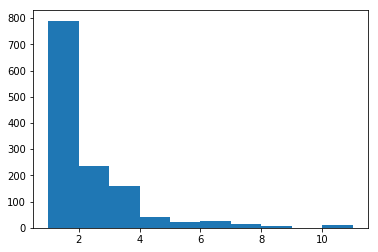

In [616]:
plt.hist(combined_train_test['family_size'])

(array([891., 319.,  42.,  20.,   0.,  22.,   6.,   0.,   0.,   9.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

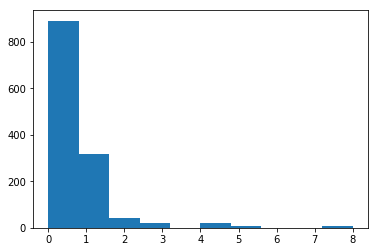

In [611]:
plt.hist(combined_train_test['SibSp'])

In [617]:
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <=4:
        return 'Small family'
    else:
        return 'Large family'
    
combined_train_test['family_size_category'] = combined_train_test['family_size'].map(family_size_category)
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,family_size,family_size_category
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,2,Small family
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,2,Small family
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,Single
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,2,Small family
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,Single


In [622]:
combined_train_test['t'] = combined_train_test['family_size'].map(lambda x: np.where(x<=1,'single',np.where(x<=4,'small','large') ))
combined_train_test.drop('t',axis=1,inplace=True)
combined_train_test.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,family_size,family_size_category
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,2,Small family
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,2,Small family
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,Single
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,2,Small family
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,Single


In [632]:
bins = [0,1,4,11]
combined_train_test['cut_family'] = pd.cut(combined_train_test['family_size'],bins)
combined_train_test['cut_family_factor'] = pd.factorize(combined_train_test['cut_family'])[0]
le = LabelEncoder()
le.fit(np.array(['(0, 1]','(1, 4]','(4, 11]']) )

combined_train_test['cut_family_le'] = le.transform(combined_train_test['cut_family'])
# combined_train_test.family_size.describe()
combined_train_test.head()

TypeError: unorderable types: Interval() > str()

In [650]:
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,family_size,family_size_category,cut_family,cut_family_factor
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,2,Small family,"(1, 4]",0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,2,Small family,"(1, 4]",0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,1,Single,"(0, 1]",1
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,2,Small family,"(1, 4]",0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,1,Single,"(0, 1]",1


In [682]:
# missing_age_df = pd.DataFrame(combined_train_test[['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])
missing_age_df = pd.DataFrame(combined_train_test[['Age', 'Embarked', 'Sex', 'family_size','Fare', 'Pclass']])
missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

missing_age_train['Fare'].head()
print(missing_age_train.shape)

print(missing_age_train[missing_age_train['Fare'].isnull()])
missing_age_train['Fare'] = missing_age_train['Fare'].fillna(missing_age_train['Fare'].mode().iloc[0] )
print(missing_age_train[missing_age_train['Fare'].isnull()])
missing_age_train.info()


(1046, 6)
      Age  Embarked  Sex  family_size  Fare  Pclass
152  60.5         0    0            1   NaN       3
Empty DataFrame
Columns: [Age, Embarked, Sex, family_size, Fare, Pclass]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 6 columns):
Age            1046 non-null float64
Embarked       1046 non-null int64
Sex            1046 non-null int64
family_size    1046 non-null int64
Fare           1046 non-null float64
Pclass         1046 non-null int64
dtypes: float64(2), int64(4)
memory usage: 57.2 KB


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [652]:

missing_age_test.head()


,Age,Embarked,Sex,family_size,Fare,Pclass
5,NaN,2,0,1,8.4583,3
17,NaN,0,0,1,13.0000,2
19,NaN,1,1,1,7.2250,3
26,NaN,1,0,1,7.2250,3
28,NaN,2,1,1,7.8792,3


In [643]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [683]:
missing_age_X_train = missing_age_train.drop('Age',axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.iloc[:,1:]
missing_age_X_test.head()
missing_age_X_train.head()
# missing_age_Y_train.head()

,Embarked,Sex,family_size,Fare,Pclass
0,0,0,2,7.2500,3
1,1,1,2,71.2833,1
2,0,1,1,7.9250,3
3,0,1,2,53.1000,1
4,0,0,1,8.0500,3


In [700]:
missing_age_X_test.drop('Age_GB',axis=1,inplace=True)

In [714]:
#model 1 GrandientBoosting
gbm_reg = GradientBoostingRegressor(random_state=42)
gbm_reg_param_grid = {'n_estimators':[2000],'max_depth':[4],'learning_rate':[0.01],'max_features':[3]}
gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, param_grid=gbm_reg_param_grid, cv=10,n_jobs=25,verbose=1,scoring='neg_mean_squared_error' )
gbm_reg_grid.fit( missing_age_X_train, missing_age_Y_train )
print('best GB param:' + str(gbm_reg_grid.best_params_))
print('best GB score:' + str(gbm_reg_grid.best_score_))
print('train error:' + str( gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train) ))
age_gb = gbm_reg_grid.predict( missing_age_X_test )
age_gb[:5]
# missing_age_X_test.head()
# gbm_reg_grid.predict(missing_age_X_test).head()



Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    1.8s finished


best GB param:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
best GB score:-183.37336117073082
train error:-106.88713461088346


array([27.99868983, 33.23641413, 25.99941875, 27.04151868, 21.94705237])

In [713]:
#mode2 RF
rf_reg = RandomForestRegressor()
rf_params = {'n_estimators':[20],'max_depth':[3],'random_state':[0]}
rf_reg_grid = model_selection.GridSearchCV(rf_reg, param_grid = rf_params, cv=5, n_jobs=20, verbose=1, scoring='neg_mean_squared_error')
rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
print('RF best params:'+str(rf_reg_grid.best_params_))
print('RF best score:'+str(rf_reg_grid.best_score_))
print('RF train error' + str( rf_reg_grid.score(missing_age_X_train, missing_age_Y_train) )  )
age_rf = rf_reg_grid.predict( missing_age_X_test )
age_rf[:5]


Fitting 5 folds for each of 1 candidates, totalling 5 fits
RF best params:{'max_depth': 3, 'n_estimators': 20, 'random_state': 0}
RF best score:-164.56765822146107
RF train error-152.93692727828662


[Parallel(n_jobs=20)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=20)]: Done   5 out of   5 | elapsed:    0.1s finished


array([27.1943954 , 32.13431573, 27.0245733 , 27.1943954 , 27.0245733 ])

In [763]:
# missing_age_X_test = pd.concat([missing_age_X_test,pd.DataFrame(age_gb),pd.DataFrame(age_rf)],axis=1)
# missing_age_X_test.head()
# age_gb[:5]
# pd.DataFrame( missing_age_X_test, 'gb' = age_gb,'rf'=age_rf ).head()
# pd.concat( [missing_age_X_test, pd.DataFrame(age_gb)],axis=1 ).head()
# missing_age_X_test.join(age_gb).head()

missing_age_X_test['Age_GB'] = age_gb
missing_age_X_test['Age_RF'] = age_rf
# print(missing_age_X_test.head())
missing_age_X_test.loc[:,'Age'] = np.mean( [missing_age_X_test['Age_GB'],missing_age_X_test['Age_RF'] ])
print(missing_age_X_test.head())
# missing_age_X_test.apply(lambda x: x['Age_RF']).head()
def age_average(df):
    t =  float(df['Age_RF'] + df['Age_GB']) / 2
    return t
    
missing_age_X_test['Age'] = missing_age_X_test.apply(lambda x: float(x['Age_RF']+x['Age_GB'])/2,axis=1)
# missing_age_X_test.apply(lambda x: (x['Age_GB'] + x['Age_RF']) / 2 ).head()
# missing_age_test['Age'] = missing_age_X_test.apply(lambda x: (x['Age_GB'] + x['Age_RF']) / 2 )
missing_age_X_test.head()

    Embarked  Sex  family_size     Fare  Pclass     Age_GB     Age_RF  \
5          2    0            1   8.4583       3  27.998690  27.194395   
17         0    0            1  13.0000       2  33.236414  32.134316   
19         1    1            1   7.2250       3  25.999419  27.024573   
26         1    0            1   7.2250       3  27.041519  27.194395   
28         2    1            1   7.8792       3  21.947052  27.024573   

          Age  
5   29.100043  
17  29.100043  
19  29.100043  
26  29.100043  
28  29.100043  


,Embarked,Sex,family_size,Fare,Pclass,Age_GB,Age_RF,Age
5,2,0,1,8.4583,3,27.998690,27.194395,27.596543
17,0,0,1,13.0000,2,33.236414,32.134316,32.685365
19,1,1,1,7.2250,3,25.999419,27.024573,26.511996
26,1,0,1,7.2250,3,27.041519,27.194395,27.117957
28,2,1,1,7.8792,3,21.947052,27.024573,24.485813


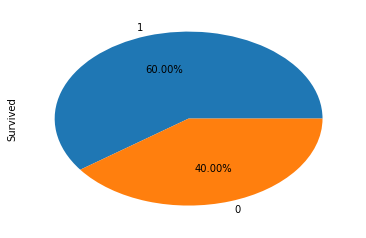

In [769]:
data_train['Survived'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [772]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,family_size,family_size_category,cut_family,cut_family_factor
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,2,Small family,"(1, 4]",0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,2,Small family,"(1, 4]",0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,1,Single,"(0, 1]",1
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,2,Small family,"(1, 4]",0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,1,Single,"(0, 1]",1


In [780]:
# combined_train_test['Ticket_letter'] = combined_train_test['Ticket'].map(lambda x: x.split()[0])
combined_train_test['Ticket_letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_letter'] = combined_train_test['Ticket_letter'].map(lambda x: 'U0' if x.isnumeric() else x)
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,family_size,family_size_category,cut_family,cut_family_factor,Ticket_letter
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,2,Small family,"(1, 4]",0,A/5
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,2,Small family,"(1, 4]",0,PC
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,1,Single,"(0, 1]",1,STON/O2.
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,2,Small family,"(1, 4]",0,U0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,1,Single,"(0, 1]",1,U0


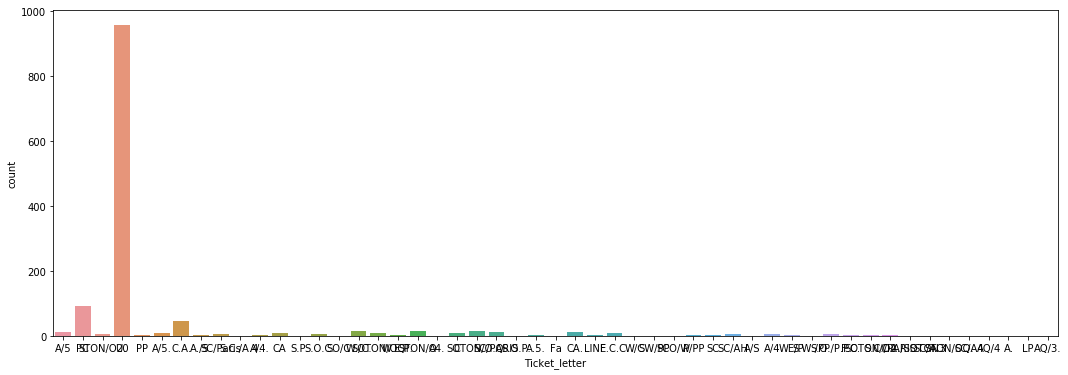

In [782]:
plt.figure(figsize=(18,6))
sns.countplot(combined_train_test['Ticket_letter'])

In [784]:
combined_train_test['Ticket_letter'].value_counts()

U0            957
PC             92
C.A.           46
SOTON/O.Q.     16
W./C.          14
STON/O         14
CA.            12
A/5            12
SC/PARIS       11
CA             10
A/5.           10
F.C.C.          9
C               8
SOTON/OQ        8
S.O.C.          7
S.O./P.P.       7
STON/O2.        7
A/4             6
SC/AH           5
SC/Paris        5
LINE            4
PP              4
F.C.            3
A/4.            3
A.5.            3
A./5.           3
S.C./PARIS      3
SOTON/O2        3
W.E.P.          2
P/PP            2
SC              2
WE/P            2
LP              1
SCO/W           1
A.              1
C.A./SOTON      1
S.W./PP         1
A/S             1
STON/OQ.        1
S.P.            1
A4.             1
SW/PP           1
S.O.P.          1
S.C./A.4.       1
Fa              1
SO/C            1
SC/A.3          1
AQ/3.           1
AQ/4            1
SC/A4           1
W/C             1
Name: Ticket_letter, dtype: int64

In [785]:
help(pd.to_numeric)

Help on function to_numeric in module pandas.core.tools.numeric:

to_numeric(arg, errors='raise', downcast=None)
    Convert argument to a numeric type.
    
    Parameters
    ----------
    arg : list, tuple, 1-d array, or Series
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception
        - If 'coerce', then invalid parsing will be set as NaN
        - If 'ignore', then invalid parsing will return the input
    downcast : {'integer', 'signed', 'unsigned', 'float'} , default None
        If not None, and if the data has been successfully cast to a
        numerical dtype (or if the data was numeric to begin with),
        downcast that resulting data to the smallest numerical dtype
        possible according to the following rules:
    
        - 'integer' or 'signed': smallest signed int dtype (min.: np.int8)
        - 'unsigned': smallest unsigned int dtype (min.: np.uint8)
        - 'float': smallest float d

In [796]:
combined_train_test['Ticket_num'] = pd.to_numeric(combined_train_test['Ticket'],errors='coerce')
combined_train_test['Ticket_num'].fillna(0,inplace=True)
combined_train_test['Ticket_num'] = combined_train_test['Ticket_num'].map(lambda x: int(x))
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,family_size,family_size_category,cut_family,cut_family_factor,Ticket_letter,Ticket_num
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,2,Small family,"(1, 4]",0,A/5,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,2,Small family,"(1, 4]",0,PC,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,1,Single,"(0, 1]",1,STON/O2.,0
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,2,Small family,"(1, 4]",0,U0,113803
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,1,Single,"(0, 1]",1,U0,373450


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


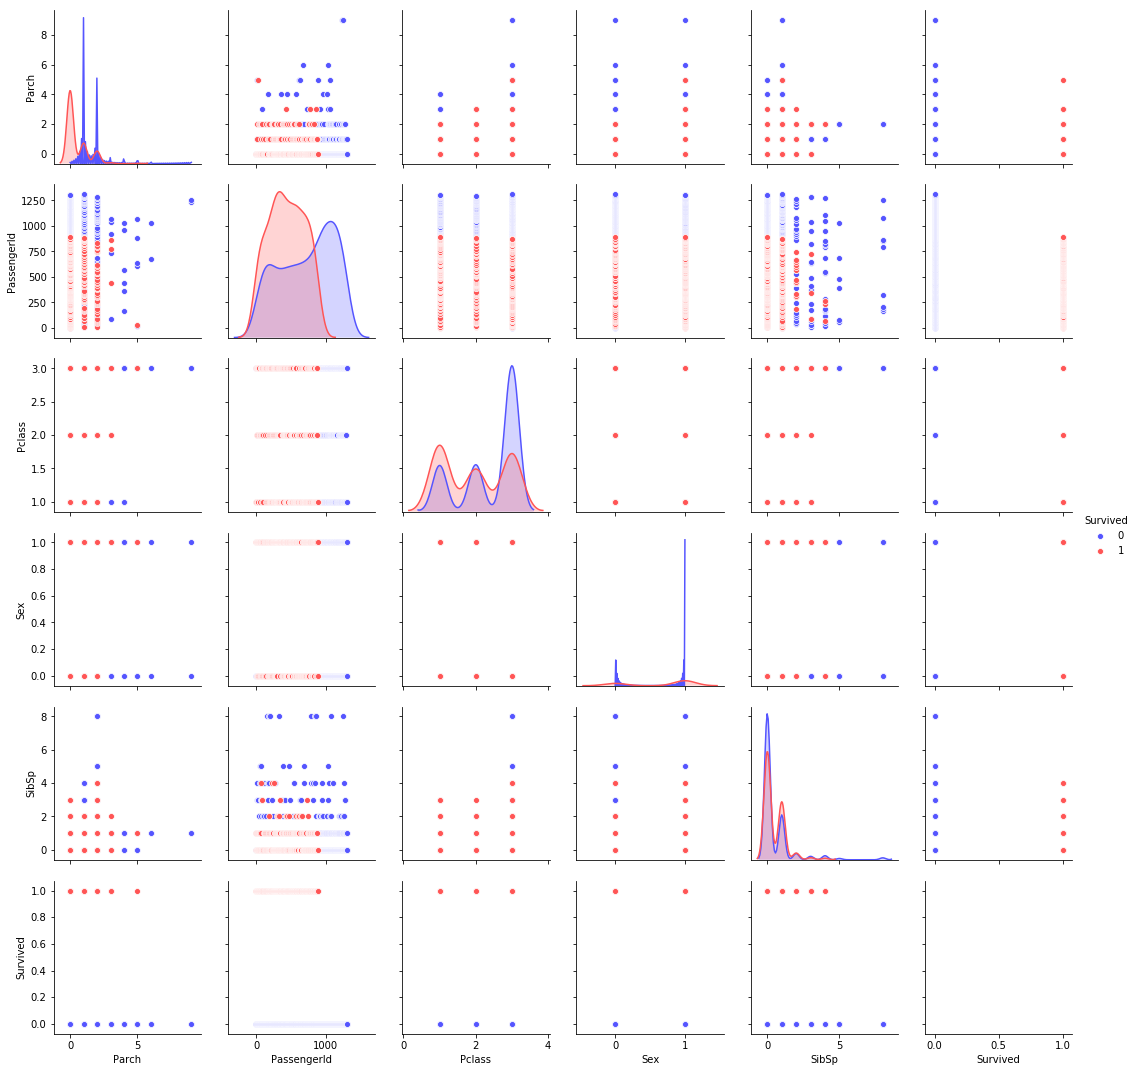

In [806]:
plotdata = combined_train_test[['Parch','PassengerId','Pclass','Sex','SibSp','Survived']]
sns.pairplot(plotdata,hue='Survived',palette='seismic',diag_kind='kde')


In [808]:
sc = StandardScaler()
sc.fit(combined_train_test[['Fare','Age']])
combined_train_test[['Fare','Age']] = sc.transform(combined_train_test[['Fare','Age']])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [809]:
plotdata.head()

,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,0,1,3,0,1,0
1,0,2,1,1,1,1
2,0,3,3,1,0,1
3,0,4,1,1,1,1
4,0,5,3,0,0,0


In [811]:
list(plotdata)

['Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived']

In [812]:
plotdata.columns.tolist()

['Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived']

In [818]:
rf_reg_grid.best_params_.feature_importances_

AttributeError: 'dict' object has no attribute 'feature_importances_'

In [819]:
rf_reg_grid.feature_importances_

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [820]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in

In [824]:
a = [40,50,20]
np.where(a)[0]

array([0, 1, 2])

In [825]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [826]:
help(np.empty)

Help on built-in function empty in module numpy.core.multiarray:

empty(...)
    empty(shape, dtype=float, order='C')
    
    Return a new array of given shape and type, without initializing entries.
    
    Parameters
    ----------
    shape : int or tuple of int
        Shape of the empty array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        Desired output data-type for the array, e.g, `numpy.int8`. Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: 'C'
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    
    Returns
    -------
    out : ndarray
        Array of uninitialized (arbitrary) data of the given shape, dtype, and
        order.  Object arrays will be initialized to None.
    
    See Also
    --------
    empty_like : Return an empty array with shape and type of input.
    ones : Return a new array setting values to one.
    zeros : Ret

In [841]:
np.concatenate((np.array([2,3]),np.array([4,5])),axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [835]:
np.array([3,4])

array([3, 4])

In [843]:
np.linspace(1,10,20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])